# Know Your Style: Fashion Products EDA


Quick look at a real fashion e-commerce catalog.  

Goal: Understand categories, price ranges, brands, ratings, and what makes items popular.


Dataset: [Fashion Clothing Products Catalog from Myntra](https://www.kaggle.com/datasets/shivamb/fashion-clothing-products-catalog)  

~12,000 products — Indian fashion e-commerce data.

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns



# Upload the CSV to Colab first (download from Kaggle link above)

# File is usually named 'fashion_products.csv' or similar

#df = pd.read_csv('/content/myntra_products_catalog.csv') # change filename if different use it for loacl files

#url_temp = "https://raw.githubusercontent.com/S33mi/know-your-style/refs/heads/main/dataset/myntra_products_catalog.csv" # Adjust if needed
#df = pd.read_csv(url_temp) # read csv from url

!wget https://raw.githubusercontent.com/S33mi/know-your-style/main/dataset/myntra_products_catalog.csv
df = pd.read_csv("myntra_products_catalog.csv")

print("Shape:", df.shape)

print("\nColumns:", df.columns.tolist())

df.head(5)

--2026-02-13 16:49:11--  https://raw.githubusercontent.com/S33mi/know-your-style/main/dataset/myntra_products_catalog.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2 [text/plain]
Saving to: ‘myntra_products_catalog.csv.1’

myntra_products_cat 100%[===================>]       2  --.-KB/s    in 0s      

2026-02-13 16:49:11 (29.9 KB/s) - ‘myntra_products_catalog.csv.1’ saved [2/2]

Shape: (12491, 8)

Columns: ['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)', 'NumImages', 'Description', 'PrimaryColor']


,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [3]:
# Missing values & types

print("Missing %:\n", df.isnull().mean() * 100)

print("\nData types:\n", df.dtypes)

Missing %:
 ProductID       0.000000
ProductName     0.000000
ProductBrand    0.000000
Gender          0.000000
Price (INR)     0.000000
NumImages       0.000000
Description     0.000000
PrimaryColor    7.157153
dtype: float64

Data types:
 ProductID        int64
ProductName     object
ProductBrand    object
Gender          object
Price (INR)      int64
NumImages        int64
Description     object
PrimaryColor    object
dtype: object


In [4]:
# Unique counts

for col in ['Gender', 'ProductBrand', 'PrimaryColor']:

    if col in df.columns:

        print(f"\nUnique {col}: {df[col].nunique()}")

        print(df[col].value_counts().head(8))


Unique Gender: 6
Gender
Women          5126
Men            4591
Unisex         1188
Boys           1100
Girls           440
Unisex Kids      46
Name: count, dtype: int64

Unique ProductBrand: 677
ProductBrand
Indian Terrain          971
Puma                    345
Pepe Jeans              340
AURELIA                 307
Flying Machine          301
W                       261
U.S. Polo Assn. Kids    234
Roadster                232
Name: count, dtype: int64

Unique PrimaryColor: 27
PrimaryColor
Blue       3443
 Black     1640
 Red       1543
 Green      908
 White      880
 Grey       684
 Brown      473
 Yellow     406
Name: count, dtype: int64


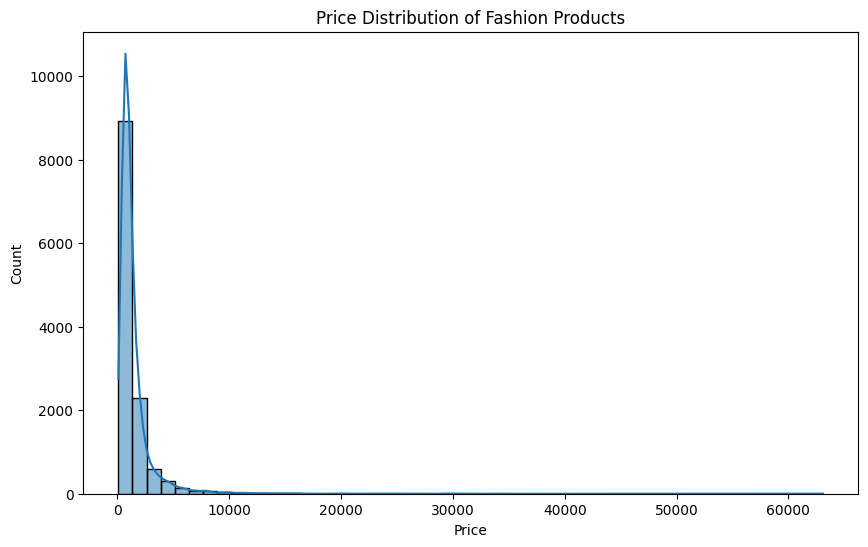

In [12]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Price (INR)'], bins=50, kde=True)

plt.title('Price Distribution of Fashion Products')

plt.xlabel('Price')

plt.ylabel('Count')

plt.show()

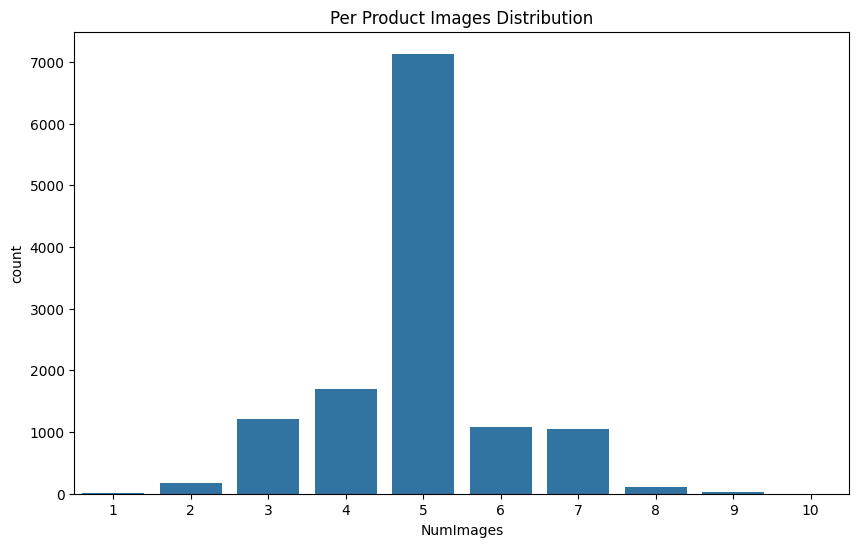

In [6]:
# If 'rating' exists use 'rating'
# Orignal data has 'NumImages' per product

if 'NumImages' in df.columns:

    plt.figure(figsize=(10, 6))

    sns.countplot(x='NumImages', data=df)

    plt.title('Product Images Distribution')

    plt.show()

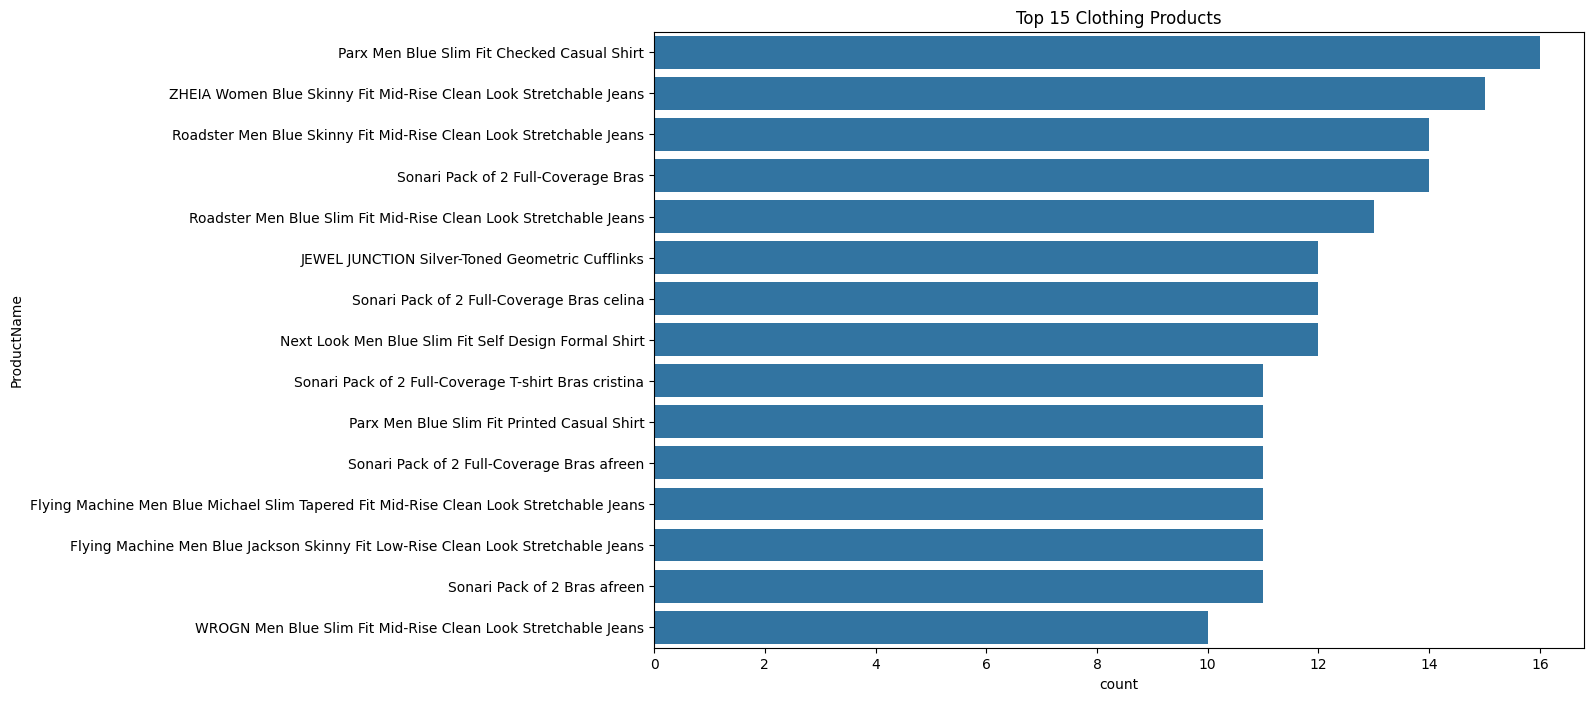

In [9]:
# Top 'ProductName'
# else use top categories

plt.figure(figsize=(12, 8))

sns.countplot(y='ProductName', data=df, order=df['ProductName'].value_counts().index[:15])

plt.title('Top 15 Clothing Products')

plt.show()

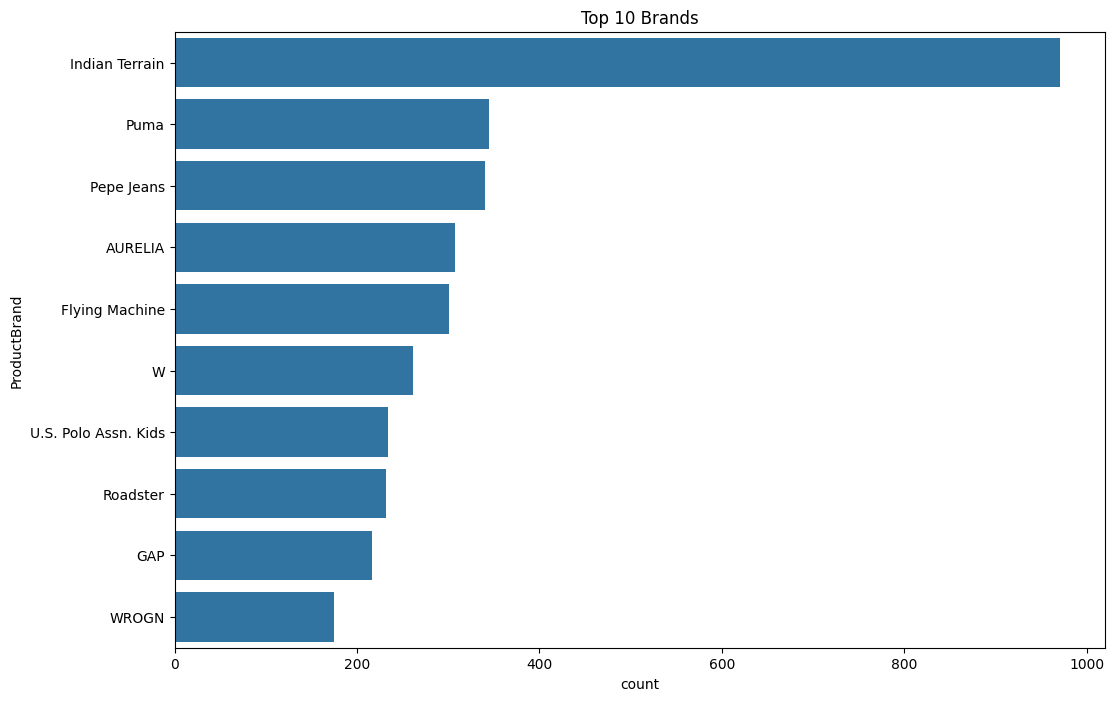

In [8]:
# Top brands

plt.figure(figsize=(12, 8))

sns.countplot(y='ProductBrand', data=df, order=df['ProductBrand'].value_counts().index[:10])

plt.title('Top 10 Brands')

plt.show()

## Quick Insights

- Most products fall in mid-price range (e.g., affordable fashion dominates).

- Top products: Shirts, jeans, bras, etc. (typical beach holiday bias)

- Ratings not available.

- Next: Add price vs rating(if any) scatter, average price per category, or string parse the top category from product names.



Feel free to fork & extend!

